# Fitting a straight line with outliers

In [7]:
import bmcmc ###only for python2
import numpy as np
import scipy.stats

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='svg'

In [42]:
import pandas as pd
png_dir='/Volumes/ExtremeSSD/CLAGN_statistic_plot/'
lagdata_append=pd.read_csv('%s/lagdata_append.csv'%png_dir)

In [43]:
lagdata_append

,Unnamed: 0,Name,tau,e_tau,E_tau,logLbol11,type
0,0,NGC1566,39.200000,13.700000,23.4,-1.088817,O
1,1,NGC 5548,84.166667,8.416667,0.0,-0.510000,O
2,2,Mrk 590,56.333333,4.200000,4.2,-0.745568,O
3,3,NGC 4151,87.000000,8.700000,0.0,-0.740000,O
4,4,NGC 4151,80.500000,0.500000,0.5,-0.965568,O
5,5,NGC 3516,89.333333,8.933333,0.0,-0.740000,O
6,6,NGC 5548,101.500000,0.300000,0.3,-0.713568,O
7,7,NGC 3516,121.833333,4.000000,4.0,-0.965568,O
8,8,NGC 2110,127.500000,13.700000,14.0,-0.046413,Type 2
9,9,NGC 3227,24.333333,0.700000,0.7,-1.397568,Type1


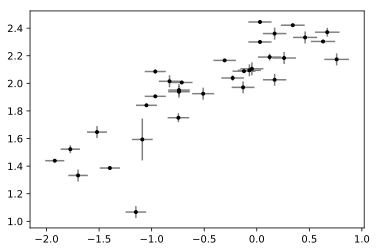

In [44]:
x_RL=lagdata_append['logLbol11']
y_RL=[]
yerr_RL=[]
xerr_RL=(lagdata_append['logLbol11']+11)*0.01

for i,j in zip(lagdata_append['tau'],lagdata_append['e_tau']):
    y_RL.append(np.log10(i))
    yerr_RL.append(j/i/np.log(10))
    
x_RL=np.array(x_RL)    
y_RL=np.array(y_RL)    
yerr_RL=np.array(yerr_RL)  
xerr_RL=np.array(xerr_RL)
plt.errorbar(x_RL, y_RL, xerr=xerr_RL,yerr=yerr_RL, fmt='.k', ecolor='gray');

In [ ]:
''' def set_args_init(self):
        # setup data points 
        np.random.seed(11)
        self.args['x']=0.5+np.random.ranf(self.eargs['dsize'])*9.5
        self.args['sigma_y']=0.25+np.random.ranf(self.eargs['dsize'])
        self.args['y']=np.random.normal(self.args['x']*2+10,self.args['sigma_y'])
        # add outliers
        self.ind=np.array([0,2,4,6,8,10,12,14,16,18])
        self.args['y'][self.ind]=np.random.normal(30,5,self.ind.size)
        self.args['y'][self.ind]=self.args['y'][self.ind]+np.random.normal(0.0,self.args['sigma_y'][self.ind])
'''


# class stlineb

In [61]:
#------------------------------------------------------------
# straight line with outliers
class stlineb(bmcmc.Model):
    def set_descr(self):
        # setup descriptor
        self.descr['m']      =['l0', 1.0, 0.2,'$m$',       -1e10,1e10]
        self.descr['c']      =['l0',10.0, 1.0,'$c$',       -1e10,1e10]
        self.descr['mu_b']   =['l0', 1.0, 1.0,'$\mu_b$',   -1e10,1e10]
        self.descr['sigma_b']=['l0', 1.0, 1.0,'$\sigma_b$',1e-10,1e10]
        self.descr['p_b']    =['l0',0.1,0.01,'$P_b$',       1e-10,0.999]

    def set_args(self):
        # setup data points 
        np.random.seed(11)
        self.args['x']=x_RL
        self.args['sigma_y']=yerr_RL
        self.args['y']=y_RL
        # add outliers
                
    def lnfunc(self,args):
        if self.eargs['outliers'] == False:
            temp1=(args['y']-(self.args['m']*self.args['x']+self.args['c']))/args['sigma_y']
            return -0.5*(temp1*temp1)-np.log(np.sqrt(2*np.pi)*args['sigma_y'])
        else:
            temp11=scipy.stats.norm.pdf(args['y'],loc=(self.args['m']*self.args['x']+self.args['c']),scale=args['sigma_y'])
            sigma_b=np.sqrt(np.square(args['sigma_y'])+np.square(args['sigma_b']))
            temp22=scipy.stats.norm.pdf(args['y'],loc=self.args['mu_b'],scale=sigma_b)
            return np.log((1-args['p_b'])*temp11+args['p_b']*temp22)

    def myplot(self,chain): 
       # optional for plotting
        plt.clf()
        x = np.linspace(-2,2)
        burn=self.chain['m'].size/2
        vals=self.best_fit(burn=burn)
        plt.errorbar(self.args['x'], self.args['y'], yerr=self.args['sigma_y'], fmt=".k")
        #plt.errorbar(self.args['x'][self.ind], self.args['y'][self.ind], yerr=self.args['sigma_y'][self.ind], fmt=".r")
        plt.plot(x,vals[0]*x+vals[1], color="g", lw=2, alpha=0.5)
        for i,key in enumerate(self.names0):
            print key
            plt.text(0.5,0.3-i*0.06,self.descr[key][3]+'='+bmcmc.stat_text(self.chain[key][burn:]),transform=plt.gca().transAxes)

        vals1=[]
        burn1=chain['m'].size/2
        for i,key in enumerate(['m','c']):
            print key
            plt.text(0.05,0.5-i*0.05,self.descr[key][3]+'='+bmcmc.stat_text(chain[key][burn1:]),transform=plt.gca().transAxes)
            vals1.append(np.mean(chain[key][burn1:]))
        plt.plot(x,vals1[0]*x+vals1[1], 'g--', lw=2, alpha=0.5)
        plt.xlabel(r'$x$')
        plt.ylabel(r'$y$')
    

In [34]:
model1=stlineb(eargs={'dsize':50})

model1.eargs['outliers']=False

model1.sample(['m','c'],10000)

chain1=model1.chain

model1.eargs['outliers']=True

model1.sample(['m','c','p_b','mu_b','sigma_b'],20000)

# myplot(chain1)

m
c
p_b
mu_b
sigma_b
m
c


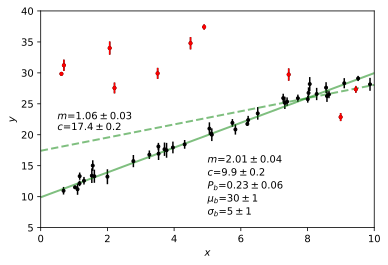

In [40]:
model1.myplot(chain1)

# RL

In [62]:
# Expected values are 
#('m','c','p_b','mu_b','sigma_b')=(2.0, 10.0, 0.2, 30, 5.0')
# list the examples you want to run
ex_names=['gauss1','gauss2','stline','gmean']
#ex_names=['gauss1','gauss2']

if 'stline' in ex_names:
    model1=stlineb(eargs={'dsize':50})
    model1.eargs['outliers']=False
    model1.sample(['m','c'],10000)
    chain1=model1.chain
    
    model1.eargs['outliers']=True
    model1.sample(['m','c','p_b','mu_b','sigma_b'],20000)

MH         1000  0.352  0.365  0.563 -1.355 [1.59331146e-06 8.84117467e-07]
               m     0.562263     0.453382
               c      2.42694     0.698333
MH         2000  0.352  0.463  0.562  0.611 [9.91909176e-06 4.00759999e-06]
               m     0.439771     0.343294
               c      2.32599     0.504143
MH         3000  0.352  0.442  0.426  0.924 [1.14781915e-05 5.68824841e-06]
               m     0.398857     0.286237
               c      2.29228     0.414418
MH         4000  0.352  0.424  0.385  1.046 [1.34107896e-05 7.17975441e-06]
               m     0.378441     0.250411
               c      2.27545     0.360094
MH         5000  0.352  0.408  0.367  0.995 [1.18533225e-05 5.50510504e-06]
               m     0.366056     0.225348
               c      2.26524     0.322734
MH         6000  0.352  0.402  0.363  1.084 [1.15097714e-05 5.98554480e-06]
               m     0.357872     0.206532
               c      2.25849     0.295006
MH         7000  0.352  0.39

/Users/brettlv/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:28: RuntimeWarning: invalid value encountered in log


MH         5000  0.275  0.303  0.427  0.059 [1.22846545e-05 4.63406955e-06 4.09436333e-02 6.87332667e-03
 4.04680812e-03]
               m     0.702253     0.490617
               c       2.3861     0.885012
             p_b     0.254116      0.13713
            mu_b      1.90603     0.100385
         sigma_b      0.39056    0.0684592
MH         6000  0.275  0.297  0.384  0.081 [1.79908908e-05 7.71174980e-06 7.17258478e-03 6.22112898e-03
 3.19505491e-03]
               m     0.650895     0.462372
               c      2.36961     0.808756
             p_b     0.329844     0.212949
            mu_b       1.9098    0.0968893
         sigma_b     0.388124    0.0663766
MH         7000  0.275  0.294  0.318  0.125 [1.66382613e-05 7.57093433e-06 6.52451939e-03 5.17993293e-03
 4.01577520e-03]
               m     0.614104     0.437466
               c      2.35777     0.749334
             p_b     0.384964     0.240914
            mu_b      1.91346    0.0945903
         sigma_b     0.386924   

## plot RL

m
c
p_b
mu_b
sigma_b
m
c


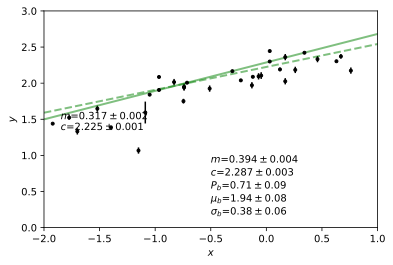

In [65]:
plt.figure()
model1.myplot(chain1)
plt.axis([-2,1,0,3,])
plt.savefig('stline.png')

In [66]:
model1.names0

['m', 'c', 'p_b', 'mu_b', 'sigma_b']